# Explorotry Data Analysis

A file is provided in .json format that contains timestamps of userlogins in a particular geographic location. 

Objective is to aggregate these login timestamps based on 15-Min time intervals and visualize and describe the resulting time series of login count in a way that best characterize the underlying pattern of demand. 
Report back with important features and of the demands and data quality issues if any.

# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import json
import datetime as dt

### Data Load


In [2]:
# loading the data using json module
path = r'..\ultimate_challenge\logins.json'
with open(path) as f:
  data = json.load(f)

In [3]:
# converting json object to dataframe object
df = pd.DataFrame(data)
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Describing data
df.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


There are no null values, but the Datatype of column is object type. 

In [6]:
# converting object type of column to datetime type
df['login_time'] = pd.to_datetime(df['login_time'])

In [7]:
# creating a count column which will be used as a base for aggregation
df['count'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   count       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [ ]:
# I got errors when trying to group data on 15 min time interval, saying i am giving a rangeindex
#df = df.set_index('login_time')

In [8]:
# setting the index of the column into datetime`
df.set_index('login_time', inplace = True)

In [9]:
# Resampling data on 15 min time interval
df = df.resample('15T').sum()

When looking at time series datea, it can be a daunting task to extract the trend of a time series, or having to find seasonality. We can use statsmodels seasonal_decomposition method that can easily extract and quantify the structure in time series data.


In [14]:
import statsmodels.api as sm
decompfreq = 4
decomposition = sm.tsa.seasonal_decompose(df['count'])

ValueError: freq T not understood. Please report if you think this is in error.

I got ValueError. I found a solution for it on stack overflow, which suggested using period(freq) parameter.
After some research i came across this article https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453. 

In [22]:
# I selected 120 as there are 120 days in 4 months roughly
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df['count'], period = 120)

Text(0.5, 1.0, 'trend')

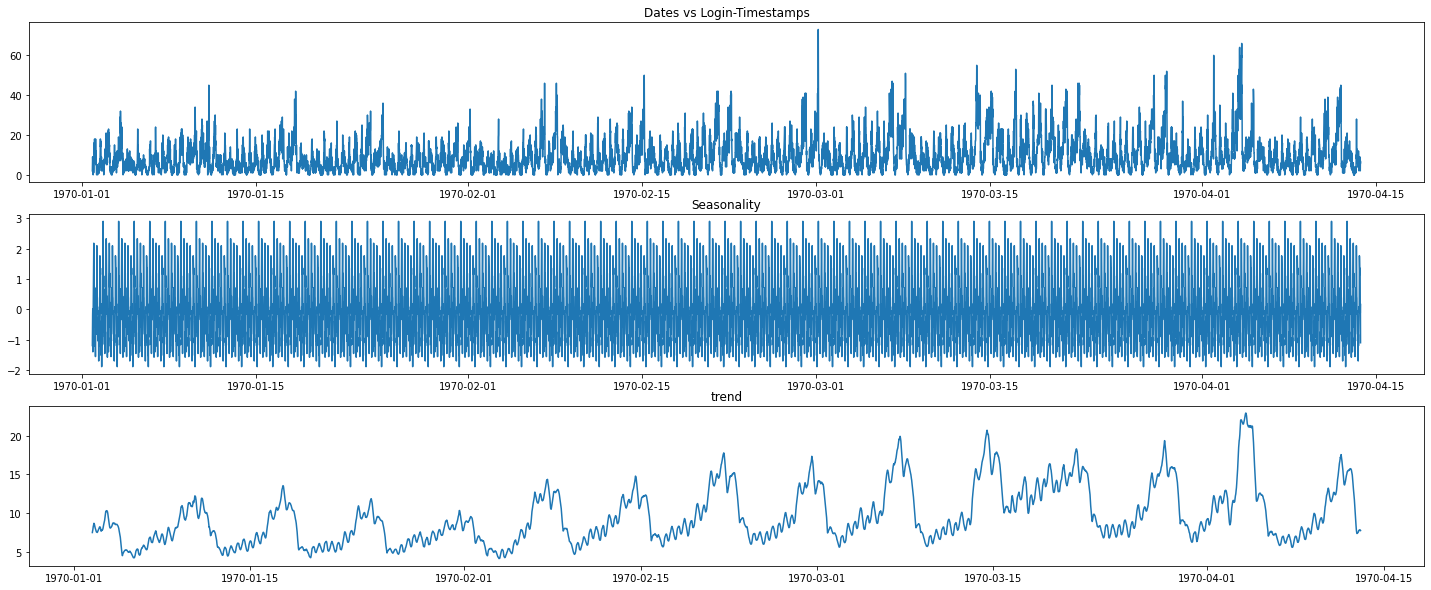

In [23]:
#plotting decomposition results
plt.figure(figsize = (25, 10))
plt.subplot(3,1,1)
plt.plot(decomposition.observed)
plt.title('Dates vs Login-Timestamps')
plt.subplot(3,1,2)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')
plt.subplot(3,1,3)
plt.plot(decomposition.trend)
plt.title('trend')

* The pattern here is hard to interpret at this level when l but clearly there is some pattern. 
* There is clearly some weekly trend with increasing frequency with time.
* It can be said that logins are inceasining overtime.

In [57]:
# Grouping hourly data using mean 
hours = ['12AM', '1AM','2AM', '3AM','4AM','5AM', '6AM','7AM', '8AM','9AM', '10AM', '11AM','12PM', 
         '1PM','2PM', '3PM','4PM','5PM', '6PM','7PM', '8PM','9PM', '10PM', '11PM']
hourly_data = df['count'].groupby(df.index.hour).mean()
hourly_data.index = hours

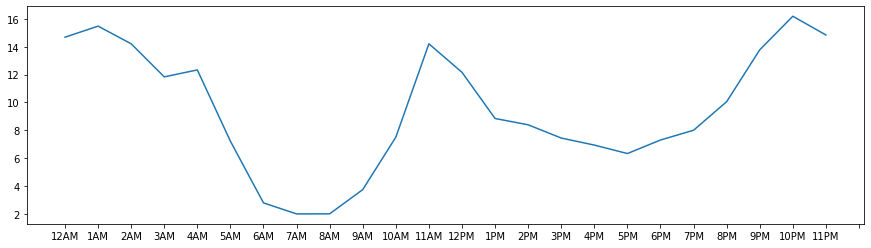

In [58]:
plt.figure(figsize = (15,4))
plt.plot(hourly_data)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]);

It is clearly visible that people are more active between 12AM and 4AM, then betwwen 9AM to 11PM and then again after 5PM.

In [49]:
#grouping data on weekdays using mean
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
weekly_data = df['count'].groupby(df.index.weekday).mean()
weekly_data.index = days

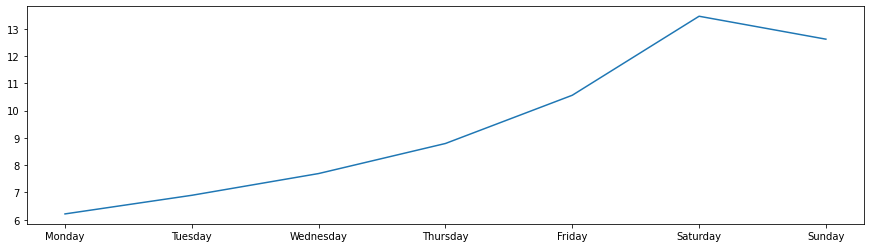

In [54]:
plt.figure(figsize = (15,4))
plt.plot(weekly_data)
plt.xticks([0,1,2,3,4,5,6]);

Activity is lowest on mondays, after which it increases and then a little drop on sundays and then sharp drop on mondays.